## Education

This notebook explores the education-features (`KO`) of Paavo data. We quickly overview the data, process it slightly, and try some basic dimension reduction techniques on it. Finally, we save it for future use.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from ydata_profiling import ProfileReport

from utils import normalize_by_population

%matplotlib inline
sns.set_theme()

Notice that we are using the pre-cleaned dataset that was processed and saved in `education.ipynb`

In [2]:
ROOT = Path(".").absolute().parent
DATA = ROOT / "data"
df = pd.read_csv(DATA / "paavo_preclean.csv", dtype={"postcode": str})
df.head()

,postcode,name,municipality,X coordinate,Y coordinate,Surface area,"Inhabitants, total (HE)",Males (HE),Females (HE),Average age of inhabitants (HE),...,Primary production (TP),Processing (TP),Services (TP),"Inhabitants, total (PT)",Employed (PT),Unemployed (PT),Children aged 0 to 14 (PT),Students (PT),Pensioners (PT),Others (PT)
0,00100,Helsinki keskusta - Etu-T��l�,Helsinki,384979,6672361,2353278,18030,8492.0,9538.0,42.0,...,25.0,2461.0,52918.0,18030,9979.0,630.0,1656.0,1559.0,3437.0,769.0
1,00120,Punavuori - Bulevardi,Helsinki,385531,6671434,414010,7192,3339.0,3853.0,41.0,...,3.0,209.0,7880.0,7192,4018.0,254.0,800.0,517.0,1242.0,361.0
2,00130,Kaartinkaupunki,Helsinki,386244,6671474,428960,1731,851.0,880.0,42.0,...,14.0,396.0,13475.0,1731,938.0,47.0,196.0,142.0,297.0,111.0
3,00140,Kaivopuisto - Ullanlinna,Helsinki,386394,6670766,931841,7729,3524.0,4205.0,43.0,...,8.0,151.0,2584.0,7729,4028.0,275.0,893.0,556.0,1565.0,412.0
4,00150,Punavuori - Eira - Hernesaari,Helsinki,385320,6670373,1367328,9239,4269.0,4970.0,42.0,...,4.0,742.0,3777.0,9239,5230.0,407.0,928.0,636.0,1577.0,461.0


Education is found with `KO`-columns

In [3]:
id_cols = ["postcode", "name", "municipality"]
cols = df.columns
edu_data = df[cols[cols.str.contains("(KO)")]]
edu_data

/var/folders/dj/8hyf7cyd59g2n7bvjfq0dnm40000gq/T/ipykernel_9126/1294023322.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  edu_data = df[cols[cols.str.contains("(KO)")]]


,"Aged 18 or over, total (KO)",Basic level studies (KO),"With education, total (KO)",Matriculation examination (KO),Vocational diploma (KO),Academic degree - Lowest level tertiary and lower university level degrees (KO),Academic degree - Higher university level degree (KO)
0,15997,1854.0,14143.0,2663.0,1690.0,3813.0,5977.0
1,6209,705.0,5504.0,1015.0,761.0,1460.0,2268.0
2,1484,192.0,1292.0,268.0,142.0,316.0,566.0
3,6674,754.0,5920.0,1087.0,689.0,1641.0,2503.0
4,8162,1003.0,7159.0,1391.0,1003.0,1954.0,2811.0
...,...,...,...,...,...,...,...
2815,133,35.0,98.0,6.0,62.0,24.0,6.0
2816,195,41.0,154.0,8.0,107.0,27.0,12.0
2817,235,64.0,171.0,17.0,97.0,44.0,13.0
2818,570,151.0,419.0,35.0,206.0,97.0,81.0


These columns could be renamed for better readability
- remove extra `(KO)`
- remove capitalization
- replace spaces, hyphens with `_`

In [4]:
edu_colnames_to = [
    "over_18_total",
    "basic_level_studies",
    "with_edu_total",
    "matriculation",
    "vocational",
    "lower_tertiary",
    "higher_tertiary",
]
edu_data = edu_data.rename(columns=dict(zip(edu_data.columns, edu_colnames_to)))
edu_data.head()

,over_18_total,basic_level_studies,with_edu_total,matriculation,vocational,lower_tertiary,higher_tertiary
0,15997,1854.0,14143.0,2663.0,1690.0,3813.0,5977.0
1,6209,705.0,5504.0,1015.0,761.0,1460.0,2268.0
2,1484,192.0,1292.0,268.0,142.0,316.0,566.0
3,6674,754.0,5920.0,1087.0,689.0,1641.0,2503.0
4,8162,1003.0,7159.0,1391.0,1003.0,1954.0,2811.0


**Notes**

- `with_edu_total` is the sum of the counts of the last four education levels: high school, vocational, and university.
- `over_18_total` is the sum of the number of basic level studies and total number of people with some further education.

Let's again normalize these by population (total number of 18+ year-olds.)

In [5]:
edu_data = normalize_by_population(edu_data, population_col="over_18_total")
edu_data.head()

,over_18_total,basic_level_studies,with_edu_total,matriculation,vocational,lower_tertiary,higher_tertiary
0,15997,0.115897,0.884103,0.166469,0.105645,0.238357,0.373633
1,6209,0.113545,0.886455,0.163472,0.122564,0.235143,0.365276
2,1484,0.129380,0.870620,0.180593,0.095687,0.212938,0.381402
3,6674,0.112976,0.887024,0.162871,0.103236,0.245880,0.375037
4,8162,0.122887,0.877113,0.170424,0.122887,0.239402,0.344401


Lets also execute a profiling report to give a quick "dashboard" to the dataset. `ProfileReport` will render an html file which can be nicely and interactively viewed. 
Note that since I know that this is a very basic dataset, I am running a very basic version of the report, stripping away correlations, heatmaps, etc. leaving only analysis of data distributions and null values. 

In [6]:
profile = ProfileReport(
    edu_data,
    title="Education demographics profile report",
    correlations=None,
    missing_diagrams={"heatmap": False},
    interactions=None,
)
profile.to_file("profile_reports/paavo_education_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Observations from the ProfileReport

- Overall, the level of education is very high in Finland: the postcode-wise average share of people with at least some education is over 75%, with more than 10 postal code areas having more than 90% of educated adults.

Good job Finland! Although lately there has been some talk about Finnish issues with Pisa scores, this data still shows that the level of education in Finland is still impressive.
Of the highly educated areas, my guess would be around big (=university) cities of Helsinki, Espoo, Turku, Tampere, and Oulu (also Jyväskylä, Pori, Rovaniemi, etc. have higher education).
Lets check this by taking the highest populations and checking their education levels:

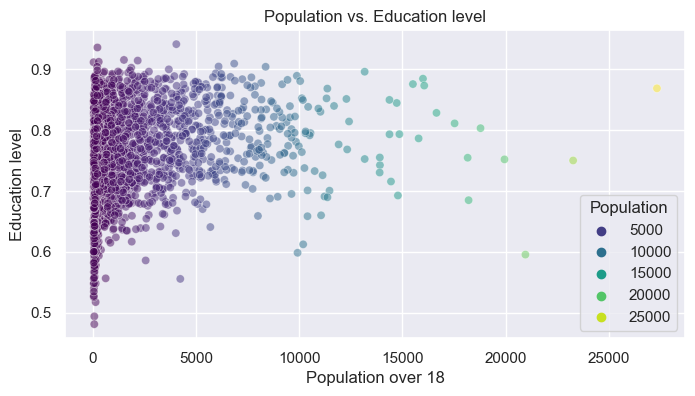

In [7]:
# Scatter plot of total population vs with edu total where the points are colored by population
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=edu_data,
    x="over_18_total",
    y="with_edu_total",
    hue="over_18_total",
    palette="viridis",
    alpha=0.5,
)
plt.title("Population vs. Education level")
plt.xlabel("Population over 18")
plt.ylabel("Education level")
plt.legend(title="Population")

So we can see that this is not exactly true. Although the lowest population shares are indeed amongst the smaller postal code areas, the opposite can not be said about populations with high education levels - there seems to be all sorts of population sizes within the top 10% percentile of shares of educated people. Therefore, as a conclusion, I would maybe make some _guesses_ that if the education level of a postalcode area is small, it is likely that it is a smaller postal code area, but I would not say that high education is necessary due to it being a high population area. 

However, the above doesnt actually take any part into the proposition of high education being more associated with larger unversity cities. This is because a high population city doesn't necessarily mean that its postal code populations are also higher. In those cities, for example, the city could possibly be partitioned into smaller areas, resulting in a more fine-tuned and small-population areas. On the other hand, in the countryside, the areas might be split up into geopgraphically large areas, resulting in some cases in larger population counts also. 

To actually check how university cities affect education levels in postal code areas, we should actually look closer into the data of those cities:

In [8]:
univ_cities = [
    "Helsinki",
    "Espoo",
    "Turku",
    "Tampere",
    "Jyväskylä",
    "Oulu",
    "Rovaniemi",
    "Kuopio"
]
df1 = pd.concat([df[id_cols], edu_data], axis=1)
df1["is_univ_city"] = df1["municipality"].isin(univ_cities)
df1.head()

,postcode,name,municipality,over_18_total,basic_level_studies,with_edu_total,matriculation,vocational,lower_tertiary,higher_tertiary,is_univ_city
0,00100,Helsinki keskusta - Etu-T��l�,Helsinki,15997,0.115897,0.884103,0.166469,0.105645,0.238357,0.373633,True
1,00120,Punavuori - Bulevardi,Helsinki,6209,0.113545,0.886455,0.163472,0.122564,0.235143,0.365276,True
2,00130,Kaartinkaupunki,Helsinki,1484,0.129380,0.870620,0.180593,0.095687,0.212938,0.381402,True
3,00140,Kaivopuisto - Ullanlinna,Helsinki,6674,0.112976,0.887024,0.162871,0.103236,0.245880,0.375037,True
4,00150,Punavuori - Eira - Hernesaari,Helsinki,8162,0.122887,0.877113,0.170424,0.122887,0.239402,0.344401,True


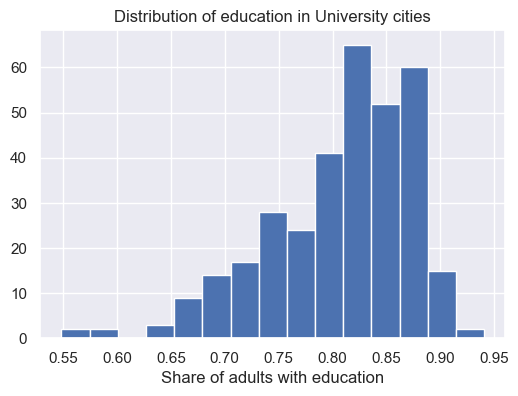

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))
df1.loc[df1["is_univ_city"], "with_edu_total"].hist(bins=15, ax=ax)
ax.set_xlabel("Share of adults with education")
ax.set_title("Distribution of education in University cities")
plt.show()

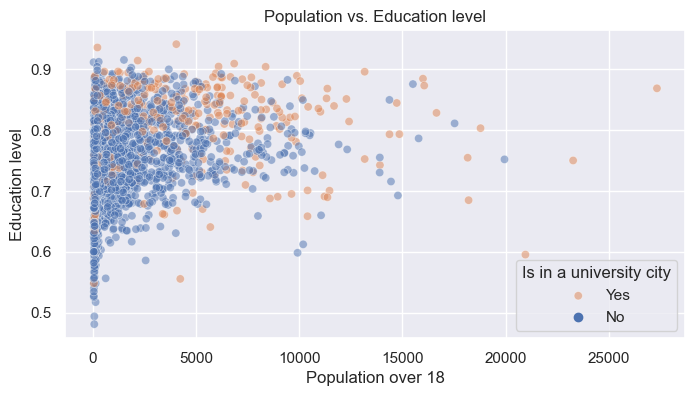

In [10]:
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=df1,
    x="over_18_total",
    y="with_edu_total",
    hue="is_univ_city",
    alpha=0.5,
)
plt.title("Population vs. Education level")
plt.xlabel("Population over 18")
plt.ylabel("Education level")
plt.legend(["Yes", "No"], title="Is in a university city")

In [11]:
m_univ = df1.loc[df1["is_univ_city"], "with_edu_total"].mean()
m_non_univ = df1.loc[~df1["is_univ_city"], "with_edu_total"].mean()

print(f"Average education level for postal code areas in university cities: {100 * m_univ :.2f}%")
print(
    f"Average education level for postal code areas outside of university cities: {100 * m_non_univ :.2f}%"
)

Average education level for postal code areas in university cities: 80.75%
Average education level for postal code areas outside of university cities: 74.96%


These plots better illustrate how the university city postal code areas contribute to the the education level dataset. Considering that the national post code average is around 76%, we can see that most of the education level "mass" lies above national average for university city areas. Further, since there is a significant difference in average education between university and non-university cities (~6 percentage points), we can say that being in a university city is associated with high education levels. On the contrary, being outside of a university city does not mean lower education levels by default, as these areas include a wide range of observed education levels.

Other than that, theres not a lot of anomalies in the data that stand out. Some variable distributions are non-normal (maybe log-normal or something like that), but I would not worry about that, as long as I remember that in situations where I would be using this data on modeling architectures that assumed normal distributions.

The only thing I would do moving forward would be to combine some features into one. I would personally use just three columns of data:
- basic education
	- shows who did not continue to _any_ education after middle school
- high school education
   - includes vocational + matriculation 
- university education
	- combines the two tertiary columns into one "higher education" column. 

This is because some of the columns are parallel, definifng a relatively similar level of education within an individual education class. Further, this dimension reduction allows for future models to potentially more efficiently executed the modeling problem, as high dimension does not challenge clustering problem as other algorithms do.

In [12]:
high_school = edu_data["matriculation"] + edu_data["vocational"]
university = edu_data["lower_tertiary"] + edu_data["higher_tertiary"]

edu = pd.DataFrame(
    {
		"basic_education": edu_data["basic_level_studies"],
        "high_school": high_school,
		"university": university,
	}
)
edu = pd.concat([df[id_cols], edu], axis=1)
edu.head()

,postcode,name,municipality,basic_education,high_school,university
0,00100,Helsinki keskusta - Etu-T��l�,Helsinki,0.115897,0.272114,0.611990
1,00120,Punavuori - Bulevardi,Helsinki,0.113545,0.286036,0.600419
2,00130,Kaartinkaupunki,Helsinki,0.129380,0.276280,0.594340
3,00140,Kaivopuisto - Ullanlinna,Helsinki,0.112976,0.266107,0.620917
4,00150,Punavuori - Eira - Hernesaari,Helsinki,0.122887,0.293310,0.583803


Finally, lets save the data for later use

In [13]:
edu.to_csv(DATA / "paavo_edu_clean.csv", index=False)

---

## Income

Income is found in two separate groups, partitioned by inhabitants (individuals), and households. For our analysis, it is not useful to keep both, as they basically contain the same information. Therefore, I will choose only one, inhabitants, as I feel personally that an individual-based exploration is more interesting.

In [14]:
income = df.loc[:, df.columns.str.contains("(HR)")]
income = pd.concat([df[id_cols], income], axis=1)
income.head()

/var/folders/dj/8hyf7cyd59g2n7bvjfq0dnm40000gq/T/ipykernel_9126/3094298474.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  income = df.loc[:, df.columns.str.contains("(HR)")]


,postcode,name,municipality,"Aged 18 or over, total (HR)",Average income of inhabitants (HR),Median income of inhabitants (HR),Inhabitants belonging to the lowest income category (HR),Inhabitants belonging to the middle income category (HR),Inhabitants belonging to the highest income category (HR),Accumulated purchasing power of inhabitants (HR)
0,00100,Helsinki keskusta - Etu-T��l�,Helsinki,15997,45302.0,31186.0,2794.0,6556.0,6647.0,724691341.0
1,00120,Punavuori - Bulevardi,Helsinki,6209,56441.0,32491.0,996.0,2444.0,2769.0,350441463.0
2,00130,Kaartinkaupunki,Helsinki,1484,77808.0,35684.0,275.0,476.0,733.0,115467133.0
3,00140,Kaivopuisto - Ullanlinna,Helsinki,6674,77060.0,33228.0,1110.0,2525.0,3039.0,514299713.0
4,00150,Punavuori - Eira - Hernesaari,Helsinki,8162,48755.0,30608.0,1330.0,3616.0,3216.0,397938367.0


In [15]:
income_colnames_to = [
    *id_cols,
    "over_18_total",
    "avg_income",
    "median_income",
    "low_income",
    "med_income",
    "high_income",
    "purchasing_power",
]
income = income.rename(columns=dict(zip(income.columns, income_colnames_to)))
income.head()

,postcode,name,municipality,over_18_total,avg_income,median_income,low_income,med_income,high_income,purchasing_power
0,00100,Helsinki keskusta - Etu-T��l�,Helsinki,15997,45302.0,31186.0,2794.0,6556.0,6647.0,724691341.0
1,00120,Punavuori - Bulevardi,Helsinki,6209,56441.0,32491.0,996.0,2444.0,2769.0,350441463.0
2,00130,Kaartinkaupunki,Helsinki,1484,77808.0,35684.0,275.0,476.0,733.0,115467133.0
3,00140,Kaivopuisto - Ullanlinna,Helsinki,6674,77060.0,33228.0,1110.0,2525.0,3039.0,514299713.0
4,00150,Punavuori - Eira - Hernesaari,Helsinki,8162,48755.0,30608.0,1330.0,3616.0,3216.0,397938367.0


The first thing I notice the large difference between mean and median incomes for some postal code areas, suggesting that the distribution is very skewed. Knowing that [wealth inequality](https://en.wikipedia.org/wiki/Economic_inequality) is a common problem in several countries, I guess that this imbalance is due to some areas having a disproportionate proportion of high-income individuals. Lets check histograms and descriptives to evaluate this

In [16]:
# summary stats of avg_income
avg_description = income["avg_income"].describe().round().astype(int)
median_description = income["median_income"].describe().round().astype(int)
pd.DataFrame(
    {
		"avg_income": avg_description,
		"median_income": median_description,
	}
)

,avg_income,median_income
count,2820,2820
mean,26736,23362
std,4982,3467
min,14329,12393
25%,23954,20886
50%,25889,23036
75%,28342,25503
max,89594,42920


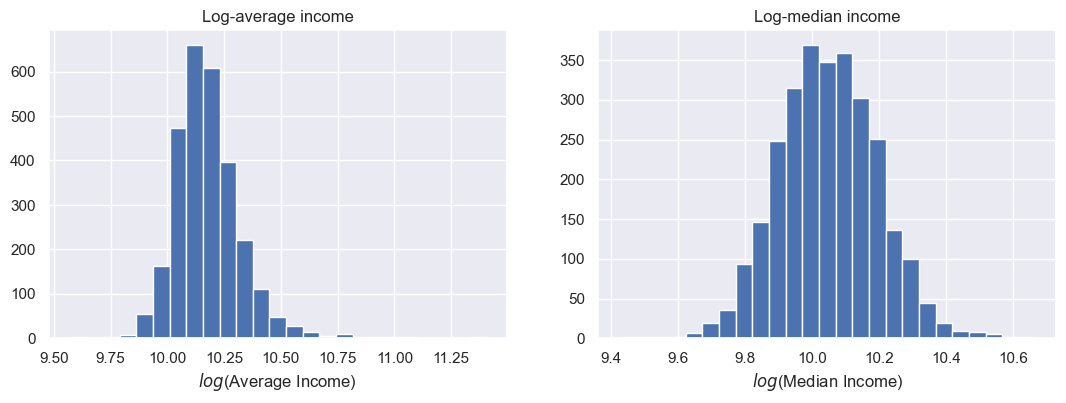

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(13, 4))
np.log(income["avg_income"]).hist(bins=25, ax=ax[0])
ax[0].set_title("Log-average income")
ax[0].set_xlabel("$log$(Average Income)")
np.log(income["median_income"]).hist(bins=25, ax=ax[1])
ax[1].set_title("Log-median income")
ax[1].set_xlabel("$log$(Median Income)")
plt.show()

From the descriptives, we can see that the average income is at all quantiles larger than median. Further, the max average income is much, much larger than the largest median income. This suggests, that there are indeed high-income individuals that dramatically increases the value of average income, but doesn't affect the more robust median that much. I believe that this observation would have been also been supported by the income groups presented in the followig three features, although at this point I didn't look into them.

Some area had an _average_ income of over 80 000€/a (wow). I suspect that these areas are around the notorious hich-income areas of Westend, Kauniainen and southern/central Helsinki. 

In [18]:
income.sort_values("avg_income", ascending=False).head(10)

,postcode,name,municipality,over_18_total,avg_income,median_income,low_income,med_income,high_income,purchasing_power
137,02160,Westend,Espoo,2518,89594.0,42920.0,398.0,608.0,1512.0,225597402.0
153,02380,Suvisaaristo,Espoo,511,87485.0,35505.0,102.0,159.0,250.0,44705018.0
22,00340,Kuusisaari - Lehtisaari,Helsinki,1450,85011.0,38583.0,230.0,437.0,783.0,123265602.0
2,00130,Kaartinkaupunki,Helsinki,1484,77808.0,35684.0,275.0,476.0,733.0,115467133.0
3,00140,Kaivopuisto - Ullanlinna,Helsinki,6674,77060.0,33228.0,1110.0,2525.0,3039.0,514299713.0
600,21160,Merimasku,Naantali,1325,65181.0,29719.0,167.0,726.0,432.0,86365230.0
66,00830,Tammisalo,Helsinki,1717,62826.0,38829.0,209.0,572.0,936.0,107872393.0
179,02700,Kauniainen,Kauniainen,7858,60283.0,35298.0,1184.0,2835.0,3839.0,473700561.0
40,00570,Kulosaari,Helsinki,3183,58071.0,33680.0,496.0,1213.0,1474.0,184840853.0
154,02390,Sarvvik,Kirkkonummi,954,57719.0,29319.0,121.0,501.0,332.0,55063533.0


Indeed Westend had the highest average income. An area that I actually completely forgot about was Suvisaaristo, which had the second biggest mean income. It makes sense, though, once you visit the area - it is absolutely beautiful! 
- Another area is higher income is interestingly Naantali. Maybe this is the summer destination for high income Turku residents?

An overall interesting observation is median income - even though the mean income is high, almost all median income values remain quite close to each other, around 35 000€. To me, what this tells me is that although Finland has its own issues, it has managed to succeed very well in wealth distribution. There are is not a small concentrated community holding most of the countries wealth. Further, in even in these "rich" neighborhoods, the bulk of the population is still built by middle-class, medium income people.

I would also really love to plot these values on a map as heatmaps. I know that at least [plotly](https://plotly.com/python/maps/) has good Python support for drawing maps. That, however, is a job for some other day. Maybe in the next notebook :) 


Before ending, lets clean up and save the data. I will (like always) normalize the income groups by population, and discard purchasing power. I didnt feel like it brought me additional information that i did not already have here. I will keep all other features, as right now I feel like all of them are interesting to explore.

In [19]:
income = income.drop(columns=["purchasing_power"])
income = normalize_by_population(income, population_col="over_18_total", skip_cols=[*id_cols, "avg_income", "median_income"])
income.head()

,postcode,name,municipality,over_18_total,avg_income,median_income,low_income,med_income,high_income
0,00100,Helsinki keskusta - Etu-T��l�,Helsinki,15997,45302.0,31186.0,0.174658,0.409827,0.415515
1,00120,Punavuori - Bulevardi,Helsinki,6209,56441.0,32491.0,0.160412,0.393622,0.445966
2,00130,Kaartinkaupunki,Helsinki,1484,77808.0,35684.0,0.185310,0.320755,0.493935
3,00140,Kaivopuisto - Ullanlinna,Helsinki,6674,77060.0,33228.0,0.166317,0.378334,0.455349
4,00150,Punavuori - Eira - Hernesaari,Helsinki,8162,48755.0,30608.0,0.162950,0.443029,0.394021


In [20]:
income = income.drop(columns=["over_18_total"])
income.to_csv(DATA / "paavo_income_clean.csv", index=False)